#Breast Cancer Prediction
#Importing the libraries



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/kaggle/breast_cancer.csv')
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [4]:
dataset.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [5]:
dataset.isnull().any()

Sample code number             False
Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

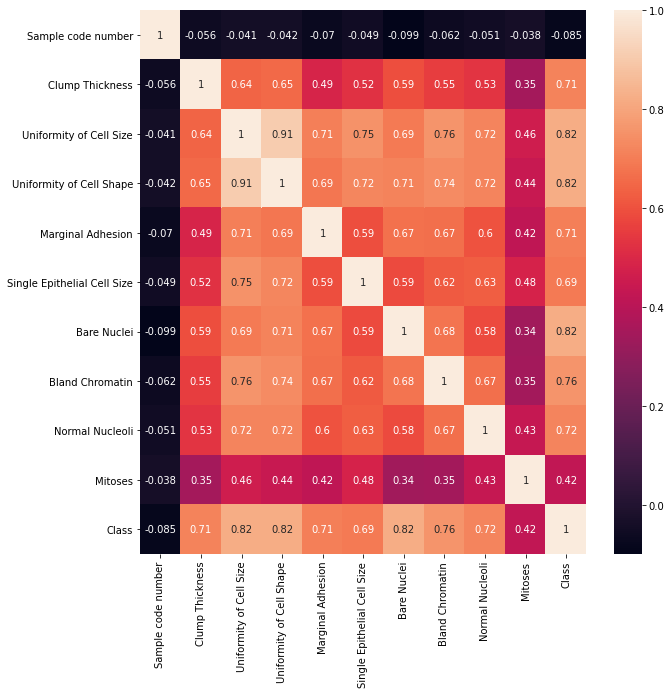

In [6]:
plt.figure(figsize = (10,10))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

In [7]:
dataset["Sample code number"].unique()

array([ 1000025,  1002945,  1015425,  1016277,  1017023,  1017122,
        1018099,  1018561,  1033078,  1035283,  1036172,  1041801,
        1043999,  1044572,  1047630,  1048672,  1049815,  1050670,
        1050718,  1054590,  1054593,  1056784,  1059552,  1065726,
        1066373,  1066979,  1067444,  1070935,  1071760,  1072179,
        1074610,  1075123,  1079304,  1080185,  1081791,  1084584,
        1091262,  1099510,  1100524,  1102573,  1103608,  1103722,
        1105257,  1105524,  1106095,  1106829,  1108370,  1108449,
        1110102,  1110503,  1110524,  1111249,  1112209,  1113038,
        1113483,  1113906,  1115282,  1115293,  1116116,  1116132,
        1116192,  1116998,  1117152,  1118039,  1120559,  1121732,
        1121919,  1123061,  1124651,  1125035,  1126417,  1131294,
        1132347,  1133041,  1133136,  1136142,  1137156,  1143978,
        1147044,  1147699,  1147748,  1148278,  1148873,  1152331,
        1155546,  1156272,  1156948,  1157734,  1158247,  1160

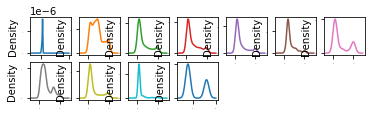

In [8]:
dataset.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=False, fontsize=1)
plt.show()

In [9]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [10]:
print(X.shape,y.shape)

(683, 9) (683,)


In [11]:
#Import the f_classif function and feed in the features and response:
from sklearn.feature_selection import f_classif
[f_stat, f_p_value] = f_classif(X, y)

In [12]:
#create a DataFrame of feature names, F-statistics, and p-values, and show it sorted on p-value:
f_test_df = pd.DataFrame({'Feature':dataset.columns[1:-1],
                          'F statistic':f_stat,
                          'p value':f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
5,Bare Nuclei,1426.240270,3.401103e-169
2,Uniformity of Cell Shape,1417.643841,1.369425e-168
1,Uniformity of Cell Size,1406.132470,8.922226e-168
6,Bland Chromatin,921.010015,1.267712e-128
7,Normal Nucleoli,727.470805,1.465645e-109
0,Clump Thickness,711.423446,7.292504e-108
3,Marginal Adhesion,677.878400,2.979778e-104
4,Single Epithelial Cell Size,622.157681,4.733540e-98
8,Mitoses,148.787689,4.304040e-31


In [13]:
# Import the SelectPercentile class:
#To select the top 20% of features according to the F-test
from sklearn.feature_selection import SelectPercentile
#Use the .fit method to fit the object on our features and response data, similar to how a model would be fit:
selector = SelectPercentile(f_classif, percentile=50)
selector.fit(X, y)

SelectPercentile(percentile=50,
                 score_func=<function f_classif at 0x7f3c71d7b680>)

In [14]:
#Capture the indices of the selected features in an array named best_feature_ix:
best_feature_ix = selector.get_support()
best_feature_ix

array([False,  True,  True, False, False,  True,  True, False, False])

In [15]:
#The feature names can be obtained using all but the last element (the response variable name) of our features_response list by indexing with :-1:
features = dataset.columns[1:-1]

In [16]:
# Find the selected feature names
best_features = [features[counter] for counter in range(len(features))
                 if best_feature_ix[counter]]
best_features

['Uniformity of Cell Size',
 'Uniformity of Cell Shape',
 'Bare Nuclei',
 'Bland Chromatin']

#Splitting the dataset into the Training set and Test set

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(546, 9)
(137, 9)
(546,)
(137,)


In [20]:
from collections import Counter
Counter(Y_train)

Counter({2: 357, 4: 189})

#Create Baseline model on the Training set

In [21]:

models_list = []
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('SVM', SVC())) 
models_list.append(('LR', LogisticRegression()))
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))

In [23]:
num_folds = 10

results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds, random_state=123)
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

CART: 0.948754 (0.036321) (run time: 0.020807)
SVM: 0.967071 (0.030354) (run time: 0.035144)
LR: 0.967003 (0.023024) (run time: 0.111486)
NB: 0.965219 (0.027777) (run time: 0.012841)
KNN: 0.974377 (0.024814) (run time: 0.046207)


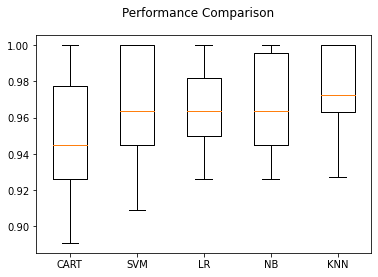

In [24]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#Evalution of Algorithms on Standardised Data

In [25]:
import warnings
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Standardize the dataset
pipelines = []

pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC( ))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsClassifier())])))

In [26]:
results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, random_state=123)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

ScaledCART: 0.939562 (0.031707) (run time: 0.035105)
ScaledSVM: 0.967037 (0.029355) (run time: 0.052328)
ScaledNB: 0.965152 (0.020947) (run time: 0.063226)
ScaledNB: 0.965219 (0.027777) (run time: 0.021687)
ScaledKNN: 0.967003 (0.028188) (run time: 0.052272)


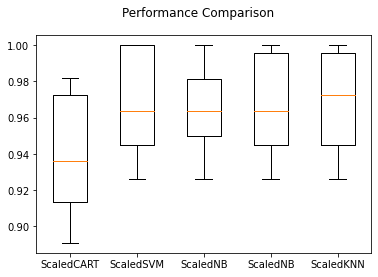

In [27]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#Hyperparameter Tuning - Tuning SVM

In [28]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: 0.974343 using {'C': 0.1, 'kernel': 'sigmoid'}
0.968855 (0.024791) with: {'C': 0.1, 'kernel': 'linear'}
0.926599 (0.043658) with: {'C': 0.1, 'kernel': 'poly'}
0.968855 (0.024791) with: {'C': 0.1, 'kernel': 'rbf'}
0.974343 (0.023539) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.968855 (0.024791) with: {'C': 0.3, 'kernel': 'linear'}
0.948653 (0.028169) with: {'C': 0.3, 'kernel': 'poly'}
0.967037 (0.027009) with: {'C': 0.3, 'kernel': 'rbf'}
0.970673 (0.025008) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.967003 (0.023024) with: {'C': 0.5, 'kernel': 'linear'}
0.954141 (0.026366) with: {'C': 0.5, 'kernel': 'poly'}
0.968855 (0.028512) with: {'C': 0.5, 'kernel': 'rbf'}
0.972525 (0.020601) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.967003 (0.023024) with: {'C': 0.7, 'kernel': 'linear'}
0.954141 (0.026366) with: {'C': 0.7, 'kernel': 'poly'}
0.968855 (0.028512) with: {'C': 0.7, 'kernel': 'rbf'}
0.966970 (0.024549) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.967003 (0.023024) with: {'C': 0.9, 'kernel': 'lin

#Application of SVC on dataset

In [29]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = SVC(C = 0.1, kernel = 'sigmoid')
start = time.time()
model.fit(X_train_scaled,Y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

Run Time: 0.007148


#Predicting the Test set results

In [30]:
#estimate accuracy on test dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)

In [31]:
score = model.score(X_test_scaled,Y_test)
score

0.948905109489051

#Making the Confusion Matrix

In [32]:
print("Accuracy: {:.2f} %".format(score*100))
print(classification_report(Y_test,predictions))

Accuracy: 94.89 %
              precision    recall  f1-score   support

           2       0.97      0.95      0.96        87
           4       0.92      0.94      0.93        50

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137



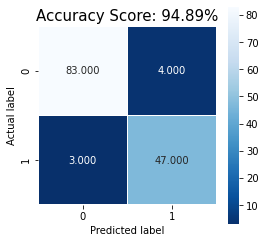

In [33]:
cm = confusion_matrix(Y_test, predictions)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.2f}%'.format(model.score(X_test_scaled,Y_test)*100)
plt.title(all_sample_title, size = 15);